### Association

It represents the difference in the mean outcomes between the treated and untreated groups. 

$$
E[Y|T=1]-E[Y|T=0]=0
$$

### Causal Effect (Averate Treatment on the Treated, ATT)

It actual average treatment effect on the treated group, using potential outcomes. 

$$
ATT = E[Y_1-Y_0|T=1]
$$

### Bias

It quantifies the difference between the expected outcome of the untreated had they been treated, versus the actual untreated group.

$$
Bias = E[Y_0|T=1]-E[Y_0|T=0]
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

In [3]:
# Dummy Data
n = 1000  
# T is the treatment assignment
T = np.random.binomial(1, 0.5, n)

In [4]:
# confounders
initial_performance = np.random.normal(70, 10, n)  # mean 70, std 10

# potential outcomes Y_0 and Y_1
# Y_0: Outcome without treatment 
# Y_1: Outcome with treatment 

Y_0 = initial_performance + np.random.normal(0, 5, n) 

# treatment effect is 5 points on average affected by initial performance
Y_1 = Y_0 + 5 + 0.1 * (initial_performance - 70) + np.random.normal(0, 5, n)  # Treated outcome with added effect

Y = np.where(T == 1, Y_1, Y_0)

data = pd.DataFrame({
    'T': T,
    'Y': Y,
    'Y_0': Y_0,
    'Y_1': Y_1,
    'Initial_Performance': initial_performance
})

data.head()

,T,Y,Y_0,Y_1,Initial_Performance
0,0,64.745423,64.745423,74.295709,71.777010
1,1,56.646858,56.231029,56.646858,56.646556
2,1,65.642570,66.278377,65.642570,73.801979
3,1,80.306501,79.906137,80.306501,76.105857
4,0,76.010103,76.010103,79.133879,75.597904


In [5]:
# Association: E[Y|T=1] - E[Y|T=0]
association = data[data['T'] == 1]['Y'].mean() - data[data['T'] == 0]['Y'].mean()
association

4.828171918722106

In [6]:
# Causal Effect (ATT): E[Y1 - Y0 | T=1]
# Since we cannot observe both Y1 and Y0 for the same individual, 
# we calculate the average for the treated group
att = (data['Y_1'] - data['Y_0'])[data['T'] == 1].mean()
att

4.794309265495569

In [7]:
# Bias: E[Y0|T=1] - E[Y0|T=0]
bias = data[data['T'] == 1]['Y_0'].mean() - data[data['T'] == 0]['Y_0'].mean()
bias 

0.033862653226535144

In [13]:
# Association = ATT + Bias
association_calculated = att + bias
association_calculated

4.828171918722104

In [11]:
results = {
    "Association (E[Y|T=1] - E[Y|T=0])": association,
    "Causal Effect (ATT, E[Y1 - Y0|T=1])": att,
    "Bias (E[Y0|T=1] - E[Y0|T=0])": bias,
    "Calculated Association (ATT + Bias)": association_calculated
}

results_df = pd.DataFrame(results, index=["Values"])
results_df

,Association (E[Y|T=1] - E[Y|T=0]),"Causal Effect (ATT, E[Y1 - Y0|T=1])",Bias (E[Y0|T=1] - E[Y0|T=0]),Calculated Association (ATT + Bias)
Values,4.828172,4.794309,0.033863,4.828172


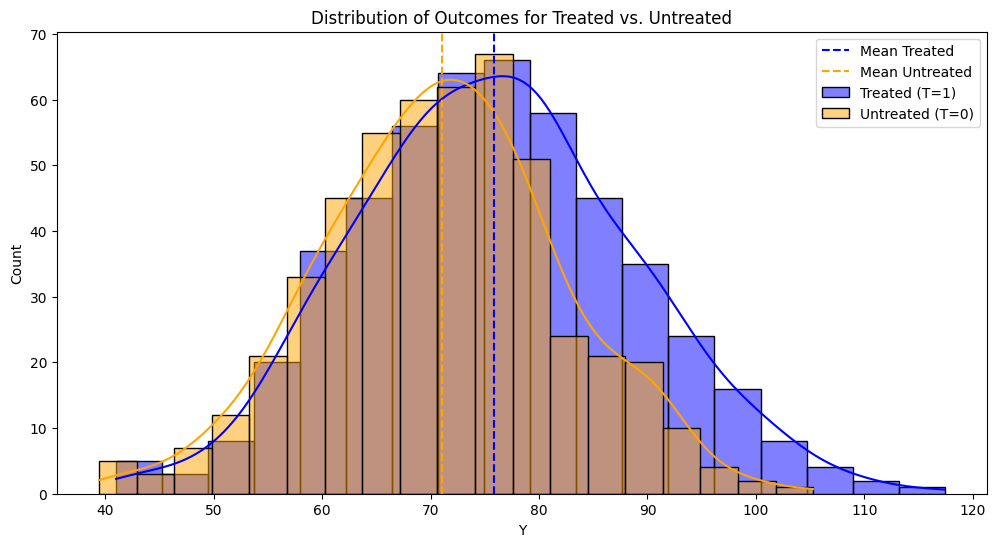

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['T'] == 1]['Y'], color='blue', label='Treated (T=1)', kde=True)
sns.histplot(data[data['T'] == 0]['Y'], color='orange', label='Untreated (T=0)', kde=True)
plt.axvline(data[data['T'] == 1]['Y'].mean(), color='blue', linestyle='--', label='Mean Treated')
plt.axvline(data[data['T'] == 0]['Y'].mean(), color='orange', linestyle='--', label='Mean Untreated')
plt.title('Distribution of Outcomes for Treated vs. Untreated')
plt.legend()
plt.show()